In [1]:
#import trained model
import tensorflow as tf
model = tf.keras.models.load_model('model')

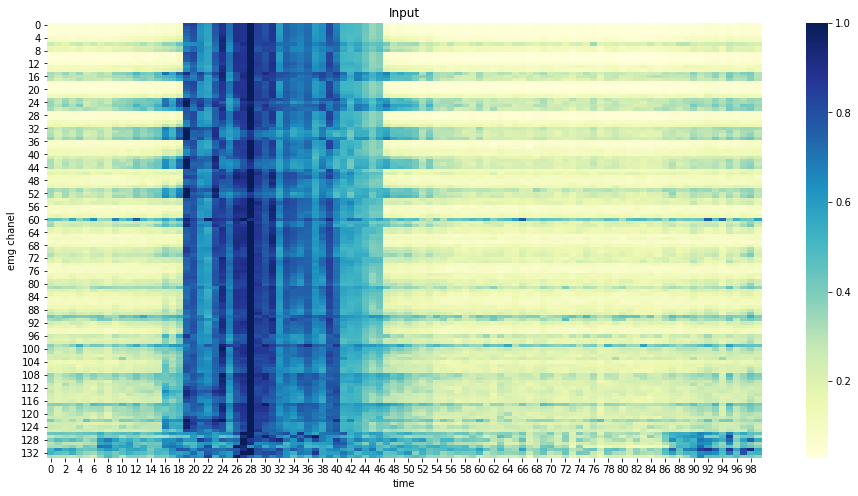

In [3]:
#Load test data 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint

X = np.load('test_data/model_X_test.npy')
Y = np.load('test_data/model_Y_test.npy')

N = 478 #randint(0,len(X))
X_signal = X[N]

plt.figure(figsize=(16, 8))
sns.heatmap(X_signal, cmap="YlGnBu")
plt.title("Input")
plt.xlabel("time")
plt.ylabel("emg chanel")
plt.show()

In [4]:
#Prediction using model
import tensorflow as tf
signal = np.mean(X_signal , axis=0)

pred = np.argmax(model.predict(np.array([X_signal])),axis = 1)
gestes = ['cilinder','thumbExt','disc','middle_flex','thumbAdd','fist','index_flex','index','pinch','middle','3digit','thumbFlex','point']

print('Predicted : ',gestes[pred[0]])
print('True : ', gestes[Y[N]])

1/1 [==============================] - 2s 2s/step
Predicted :  thumbFlex
True :  thumbFlex


  0%|          | 0/100 [00:00<?, ?it/s]

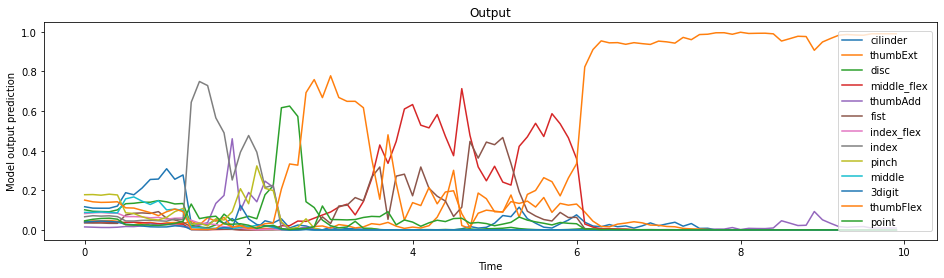

In [6]:
from tqdm.notebook import tqdm

proba_time = []
N_start = 0

for i in tqdm(range(len(signal))):
    X_time = []
    time_set = np.zeros(len(signal))
    time_set[N_start:N_start+i+1] += 1
    for i in range(len(X_signal)):
        X_time.append(X_signal[i]*time_set)
    proba_time.append(model.predict(np.array([X_time]), verbose = 0)[0])

proba_time_time = np.zeros((100,13))
proba_time_time[N_start:N_start+len(proba_time),:] += proba_time
plt.figure(figsize=(16, 4))
plt.plot([i/10 for i in range(100)],proba_time_time)
plt.legend([gestes[i] for i in range(len(gestes))], loc = 'right')
plt.ylabel('Model output prediction')
plt.xlabel('Time')
plt.title('Output')
plt.show()